In [18]:
# ライブラリの呼び出し
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# 分析データの取得
# 対象は2023年パリーグのチーム別打撃成績

url = 'https://npb.jp/bis/2023/stats/tmb_p.html'
df = pd.read_html(url)

# テーブル数確認（1個なはず）
print(len(df))

2


In [3]:
# 2個でてきたので中身を確認
print(df[0])

      チーム   打  率  試  合  打  席  打  数  得  点  安  打  二 塁 打  三 塁 打  本 塁 打  ...  \
0   オリックス  0.250   143  5324  4782   508  1194    211     17    109  ...   
1  ソフトバンク  0.248   143  5454  4786   536  1185    195     15    104  ...   
2     楽　天  0.244   143  5369  4667   513  1140    168     25    104  ...   
3     ロッテ  0.239   143  5414  4744   505  1135    220     12    100  ...   
4     西　武  0.233   143  5222  4672   435  1088    188     21     90  ...   
5    日本ハム  0.231   143  5248  4688   464  1082    195     18    100  ...   

   盗 塁 刺  犠  打  犠  飛  四  球  故 意 四  死  球  三  振  併 殺 打  長 打 率  出 塁 率  
0     32    83    25   371      8    63   986    106  0.369  0.311  
1     30   107    38   470     14    53  1053     88  0.360  0.319  
2     38   125    33   490      9    52   937    108  0.358  0.321  
3     21   116    39   453     20    62  1011     79  0.354  0.311  
4     38    90    28   387      9    45  1045     97  0.340  0.296  
5     49    84    25   397     10    54  1111     78 

In [4]:
print(df[1])

                                           0              1
0  パ・リーグ || チーム勝敗表 | チーム打撃 | チーム投手 | チーム守備 |  >> セ・リーグ 打撃成績


In [6]:
# データを眺めてみる
all = df[0]
all

,チーム,打 率,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,...,盗 塁 刺,犠 打,犠 飛,四 球,故 意 四,死 球,三 振,併 殺 打,長 打 率,出 塁 率
0,オリックス,0.250,143,5324,4782,508,1194,211,17,109,...,32,83,25,371,8,63,986,106,0.369,0.311
1,ソフトバンク,0.248,143,5454,4786,536,1185,195,15,104,...,30,107,38,470,14,53,1053,88,0.360,0.319
2,楽 天,0.244,143,5369,4667,513,1140,168,25,104,...,38,125,33,490,9,52,937,108,0.358,0.321
3,ロッテ,0.239,143,5414,4744,505,1135,220,12,100,...,21,116,39,453,20,62,1011,79,0.354,0.311
4,西 武,0.233,143,5222,4672,435,1088,188,21,90,...,38,90,28,387,9,45,1045,97,0.340,0.296
5,日本ハム,0.231,143,5248,4688,464,1082,195,18,100,...,49,84,25,397,10,54,1111,78,0.344,0.297


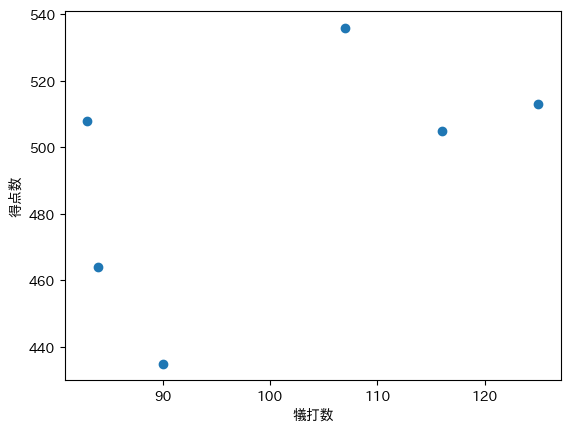

In [14]:
# 2変数の散布図を作成
plt.scatter(all['犠  打'], all['得  点'])
plt.xlabel('犠打数')
plt.ylabel('得点数')
plt.show()

In [30]:
# 単回帰分析リベンジ
uni_reg = LinearRegression() # インスタンス作成

X = all[['犠  打']] # 独立変数
Y = all['得  点'] # 従属変数

uni_reg.fit(X,Y)

LinearRegression()

In [25]:
# 型確認
type(all['犠  打']) # pandas.core.series.Series

pandas.core.series.Series

In [27]:
# 二重かっこだと…
type(all[['犠  打']]) # pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [31]:
# 単回帰分析リベンジ
uni_reg = LinearRegression() # インスタンス作成

X = all[['犠  打']] # 独立変数
Y = all['得  点'] # 従属変数

uni_reg.fit(X,Y)

LinearRegression()

In [32]:
# 推定結果を出力
coef = uni_reg.coef_[0]
itc = uni_reg.intercept_

print(f"傾きは{coef}, 切片は{itc}")
# 傾きは1.1328381962864724, 切片は379.272148541114

傾きは1.1328381962864724, 切片は379.272148541114


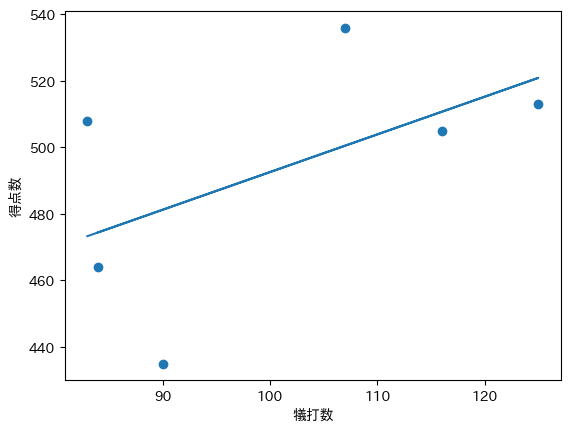

In [34]:
# 回帰直線の図示
plt.scatter(X, Y)
plt.plot(X, uni_reg.predict(X))
plt.xlabel('犠打数')
plt.ylabel('得点数')
plt.show()

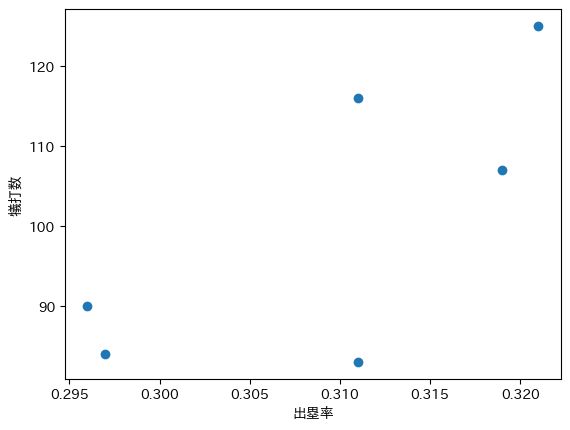

In [35]:
# 出塁率が交絡因子になっているのでは？
# 出塁率と犠打を図示
plt.scatter(all['出 塁 率'], all['犠  打'])
plt.xlabel('出塁率')
plt.ylabel('犠打数')
plt.show()

In [36]:
# 出塁率を独立変数に追加して重回帰
multi_reg = LinearRegression() # インスタンス作成
X = all[['犠  打', '出 塁 率']]
Y = all['得  点']

multi_reg.fit(X, Y)

LinearRegression()